In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Simple Linear Regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Data Prep

#### Generate

In [18]:
# Generate input data
np.random.seed(100)

n_samples = 30

X = np.linspace(0, 10, n_samples)
print(X)

[ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]


In [19]:
# Set a regression function
f1 = lambda x: 1.5 + np.pi * x
# Use regression function to generate some ouput values
y = f1(X)
print(y)

[ 1.5         2.58330781  3.66661562  4.74992343  5.83323125  6.91653906
  7.99984687  9.08315468 10.16646249 11.2497703  12.33307812 13.41638593
 14.49969374 15.58300155 16.66630936 17.74961717 18.83292499 19.9162328
 20.99954061 22.08284842 23.16615623 24.24946404 25.33277185 26.41607967
 27.49938748 28.58269529 29.6660031  30.74931091 31.83261872 32.91592654]


In [26]:
# Add some noise to the output data
y += np.random.randn(n_samples) * 0.5
print(y)

[ 1.26124671  1.93023539  3.51904663  5.10766323  6.40471778  6.79140936
  8.63889394  8.0238376   9.4503638  10.68455334 11.96925314 13.16933276
 14.38663201 15.4399016  17.45072756 16.86218713 18.23501386 20.30093321
 20.10512423 22.5945417  22.89594377 24.28291198 24.81237295 25.83362634
 27.59072295 29.02401653 29.3810895  31.64635701 31.72756549 32.482196  ]


In [21]:
# Convert input to a feature vector
X = np.transpose([X])
print(X)

[[ 0.        ]
 [ 0.34482759]
 [ 0.68965517]
 [ 1.03448276]
 [ 1.37931034]
 [ 1.72413793]
 [ 2.06896552]
 [ 2.4137931 ]
 [ 2.75862069]
 [ 3.10344828]
 [ 3.44827586]
 [ 3.79310345]
 [ 4.13793103]
 [ 4.48275862]
 [ 4.82758621]
 [ 5.17241379]
 [ 5.51724138]
 [ 5.86206897]
 [ 6.20689655]
 [ 6.55172414]
 [ 6.89655172]
 [ 7.24137931]
 [ 7.5862069 ]
 [ 7.93103448]
 [ 8.27586207]
 [ 8.62068966]
 [ 8.96551724]
 [ 9.31034483]
 [ 9.65517241]
 [10.        ]]


### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Build Model and Predict

In [9]:
from sklearn.linear_model import LinearRegression

In [28]:
# With Intercept
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print (lr.intercept_)
print (lr.coef_)
print ('Estimated function: y = {:.4f} + {:.4f}x'.format(lr.intercept_, lr.coef_[0]))

1.2759795838851087
[3.15987606]
Estimated function: y = 1.2760 + 3.1599x


In [33]:
# Without Intercept
lr_no_intercept = LinearRegression(fit_intercept=False)
lr_no_intercept.fit(X_train, y_train)
print (lr_no_intercept.intercept_)
print (lr_no_intercept.coef_)
print ('Estimated function: y = {:.4f} + {:.4f}x'.format(lr_no_intercept.intercept_, lr_no_intercept.coef_[0]))

0.0
[3.35656404]
Estimated function: y = 0.0000 + 3.3566x


In [30]:
# Predict
y_pred = lr.predict(X_test)
type(y_pred)

numpy.ndarray

### Vizualize

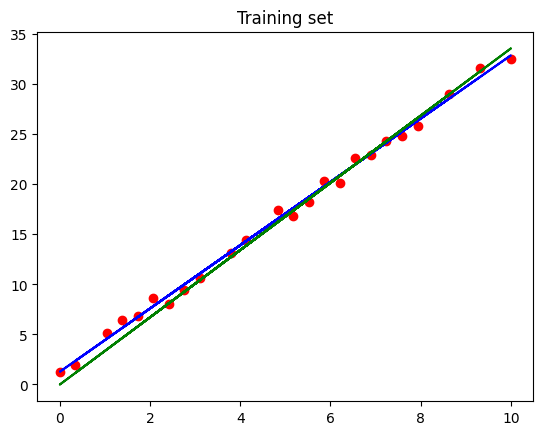

In [34]:
# Vizualize the training set
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
# regressor without intercept
plt.plot(X_train, lr_no_intercept.predict(X_train), color = 'green')
plt.title('Training set')
plt.show()

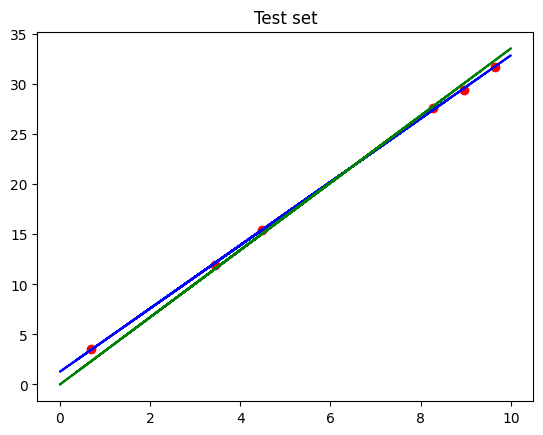

In [35]:
# Vizualize the test set
plt.scatter(X_test, y_test, color='red')
# Since the regression line is the same, we can plot it using the train data itself
plt.plot(X_train, lr.predict(X_train), color = 'blue') 
# plt.plot(X_test, lr.predict(X_test), color = 'blue')   # same as above
# regressor without intercept
plt.plot(X_train, lr_no_intercept.predict(X_train), color = 'green')
plt.title('Test set')
plt.show()

### Predict output for a single value

In [36]:
# Note:
# The "predict" method always expects a 2D array as the format of its inputs. 
# And putting the value into a double pair of square brackets makes the input a 2D array. 
# For instance:
# 3.3→scalar 
# [3.3]→1D array 
# [[3.3]]→2D array
print(lr.predict([[3.3]]))

[11.70357058]


## Multiple Linear Regression

### Data Prep

#### Read

In [33]:
dataset = pd.read_csv('data/Multiple_linear_Reg_data.csv')
dataset.head(2)

,R&D Spend,Administration,Marketing Spend,Country,Profit
0,165349.2,136897.80,471784.10,United States,192261.83
1,162597.7,151377.59,443898.53,Canada,191792.06


In [34]:
X = dataset.iloc[:, :-1].values   # Get all Rows and All but last column - independent variables
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(50, 4)
<class 'numpy.ndarray'>
(50,)


#### Encoding categorical data

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The third parameter for transformers below is the index of the column that needs to be encoded - IT IS NOT THE ACTUAL DATA
# remainder='passthrough' ensures that the rest of the columns are passed as it. 
# Without this parameter, the rest of the columns will be dropped
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# print("X Values: ", X)

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Build Model and Predict

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# With Intercept (Default)
lr = LinearRegression()
lr.fit(X_train, y_train)
print (lr.intercept_)
print (lr.coef_)

42467.529248579056
[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]


In [28]:
# Predict
y_pred = lr.predict(X_test)
type(y_pred)

numpy.ndarray

### Check Predictions

In [29]:
# set display options
np.set_printoptions(precision=2)

In [30]:
# Convert test and predicted arrays to vertical arrays
print("Test array shape before change: ", y_test.shape)
y_test = y_test.reshape(len(y_test),1)
print("Test array shape after change: ", y_test.shape)
print("\nPredicted array shape before change: ", y_pred.shape)
y_pred = y_pred.reshape(len(y_pred),1)
print("Predicted array shape after change: ", y_pred.shape)

Test array shape before change:  (10,)
Test array shape after change:  (10, 1)

Predicted array shape before change:  (10,)
Predicted array shape after change:  (10, 1)


In [31]:
# Print test and pred arrays side by side
print(np.concatenate((y_test,y_pred, y_test-y_pred),axis=1))

[[103282.38 103015.2     267.18]
 [144259.4  132582.28  11677.12]
 [146121.95 132447.74  13674.21]
 [ 77798.83  71976.1    5822.73]
 [191050.39 178537.48  12512.91]
 [105008.31 116161.24 -11152.93]
 [ 81229.06  67851.69  13377.37]
 [ 97483.56  98791.73  -1308.17]
 [110352.25 113969.44  -3617.19]
 [166187.94 167921.07  -1733.13]]


### Predict output for a single value

In [32]:
print(lr.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


### Backward Eliminition
https://www.statsmodels.org/stable/index.html

In [36]:
import statsmodels.api as sm
# Statsmodel does not take into account the constant (intercept).
# So we need to add it in the form b0x0 where x0 is an array of 1s

# Here X is the array after one hot encoding the independent variable
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [37]:
X.shape

(50, 6)

In [38]:
# Start the backward elimination by including the indices for all the independent variables
# Remove the variable with the highest p-value till there are no independent variables 
# left with p-value greater than the expected significance level
# This example is for significance level 0.05
X_optimal = X[:, [0, 1, 2, 3, 4, 5]]
X_optimal = X_optimal.astype(np.float64)

In [14]:
# Backward Elimination Step 1
# Define regressor from statsmodel and fit
# endog is the dependent variable
# exog is the independent variable
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()

In [15]:
# Get the summary stats 
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.34e-27
Time:                        22:18:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Backward Elimination Step 2
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 2 was removed based on the above stats
X_optimal = X[:, [0, 1, 3, 4, 5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           8.49e-29
Time:                        22:20:56   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Backward Elimination Step 3
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 1 was removed based on the above stats
X_optimal = X[:, [0, 3, 4, 5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        22:21:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Backward Elimination Step 4
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 4 was removed based on the above stats
X_optimal = X[:, [0, 3, 5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           2.16e-31
Time:                        22:22:16   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Backward Elimination Step 5
# Remove the independent variable with the highest p-value and repeat the previous step
# Independene variable with index 5 was removed based on the above stats
X_optimal = X[:, [0, 3]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

# Since there aren't any independent variable with p-value greater than the expected 
# significance level is left, this X_optimal is the final model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.50e-32
Time:                        22:22:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Polynomial Regression

### Data Prep

#### Read

In [40]:
dataset = pd.read_csv('data/Polynomial_Reg_data.csv')
dataset.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [45]:
X = dataset.iloc[:, 1:-1].values   # Get all Rows and All but last column - independent variables
# For this dataset the second column represents the numerical version of the first column 
# so we dont need to pull in the first column
y = dataset.iloc[:, -1].values    # Get all Rows and last column - dependent variable
# print("X Values: ", X)
print(type(X))
print(X.shape)
# print("y Values: ", y)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(10, 1)
<class 'numpy.ndarray'>
(10,)


### Build Model and Predict

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# Generate more features
num_features = 2
pf = PolynomialFeatures(degree=num_features, include_bias=False)
X2 = pf.fit_transform(X)

In [50]:
# Test using linear regression model
lr = LinearRegression()
lr.fit(X, y)
print (lr.intercept_)
print (lr.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x'.format(lr.intercept_, lr.coef_[0]))

-195333.33333333337
[80878.79]
Estimated function: y = -195333.33 + 80878.79x


In [52]:
# Test with polynomial regression
lr2 = LinearRegression()
lr2.fit(X2, y)
print (lr2.intercept_)
print (lr2.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x + {:.2f}x^2'.format(lr2.intercept_, lr2.coef_[0], lr2.coef_[1]))

232166.66666666686
[-132871.21   19431.82]
Estimated function: y = 232166.67 + -132871.21x + 19431.82x^2


In [57]:
# Test with polynomial regression for degree 4
num_features = 4
pf4 = PolynomialFeatures(degree=num_features, include_bias=False)
X4 = pf4.fit_transform(X)
lr4 = LinearRegression()
lr4.fit(X4, y)
print (lr4.intercept_)
print (lr4.coef_)
print ('Estimated function: y = {:.2f} + {:.2f}x + {:.2f}x^2 + {:.2f}x^3 + {:.2f}x^4'.format(lr4.intercept_, lr4.coef_[0], lr4.coef_[1], lr4.coef_[2], lr4.coef_[3]))

184166.66666671215
[-211002.33   94765.44  -15463.29     890.15]
Estimated function: y = 184166.67 + -211002.33x + 94765.44x^2 + -15463.29x^3 + 890.15x^4


### Vizualize

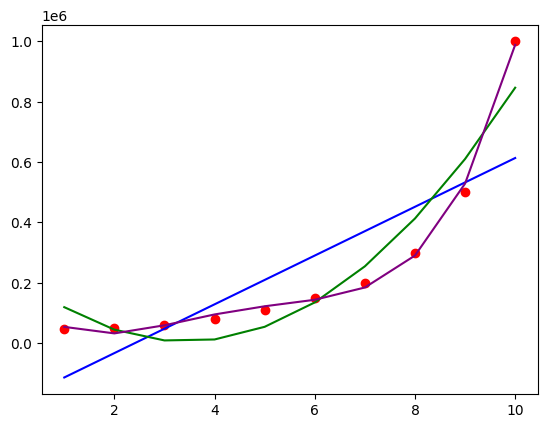

In [58]:
# Plot input points
plt.scatter(X, y, color = 'red')
# Plot linear regression predictions
plt.plot(X, lr.predict(X), color = 'blue')
# Plot polynomial regression predictions
plt.plot(X, lr2.predict(X2), color = 'green')
# Plot polynomial regression predictions for degree 4
plt.plot(X, lr4.predict(X4), color = 'purple')

/var/folders/ls/5lqzwfjn3s76sfqks59rdzdm0000gn/T/ipykernel_2584/1990486195.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_fin = np.arange(min(X), max(X), 0.1)


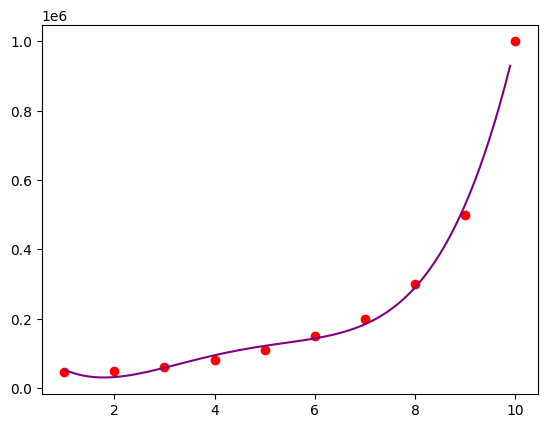

In [62]:
# Plot smoother curve for polynomial regression predictions for degree 4
# using a finer grain of data
X_fin = np.arange(min(X), max(X), 0.1)
X_fin = X_fin.reshape((len(X_fin), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_fin, lr4.predict(pf4.fit_transform(X_fin)), color = 'purple')

## Predict

### Predict output for a single value

In [61]:
# Predict using linear regression model
print("Linear Model Predicted value is: ", lr.predict([[6.5]]))

# Predict using polynomial regression model of degree 2
print("Poly2 Model Predicted value is: ", lr2.predict(pf.transform([[6.5]])))

# Predict using polynomial regression model of degree 2
print("Poly2 Model Predicted value is: ", lr4.predict(pf4.transform([[6.5]])))

Linear Model Predicted value is:  [330378.79]
Poly2 Model Predicted value is:  [189498.11]
Poly2 Model Predicted value is:  [158862.45]
